In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/ciurlo/Documents/UCLA/efit5/python/')
import gcwork.efit.efit5_results as ef
from math import pi

#sys.path.append('/Users/ciurlo/anaconda2/lib/python2.7/site-packages/skimage/feature/')
import corner as co
import os
#print os.getcwd()

In [58]:
## Load files

blob = 'G3'
corr = '_sys' # '' # _sys ##### vz0 # sysRV

ch   = np.loadtxt('./chains_'+blob+corr+'/efit-.txt')
## structure:
# 9  - P
# 10 - T0
# 11 - e
# 12 - i
# 13 - omega
# 14 - Big Omega
# 15 - add err astro
# 16 - add err RV

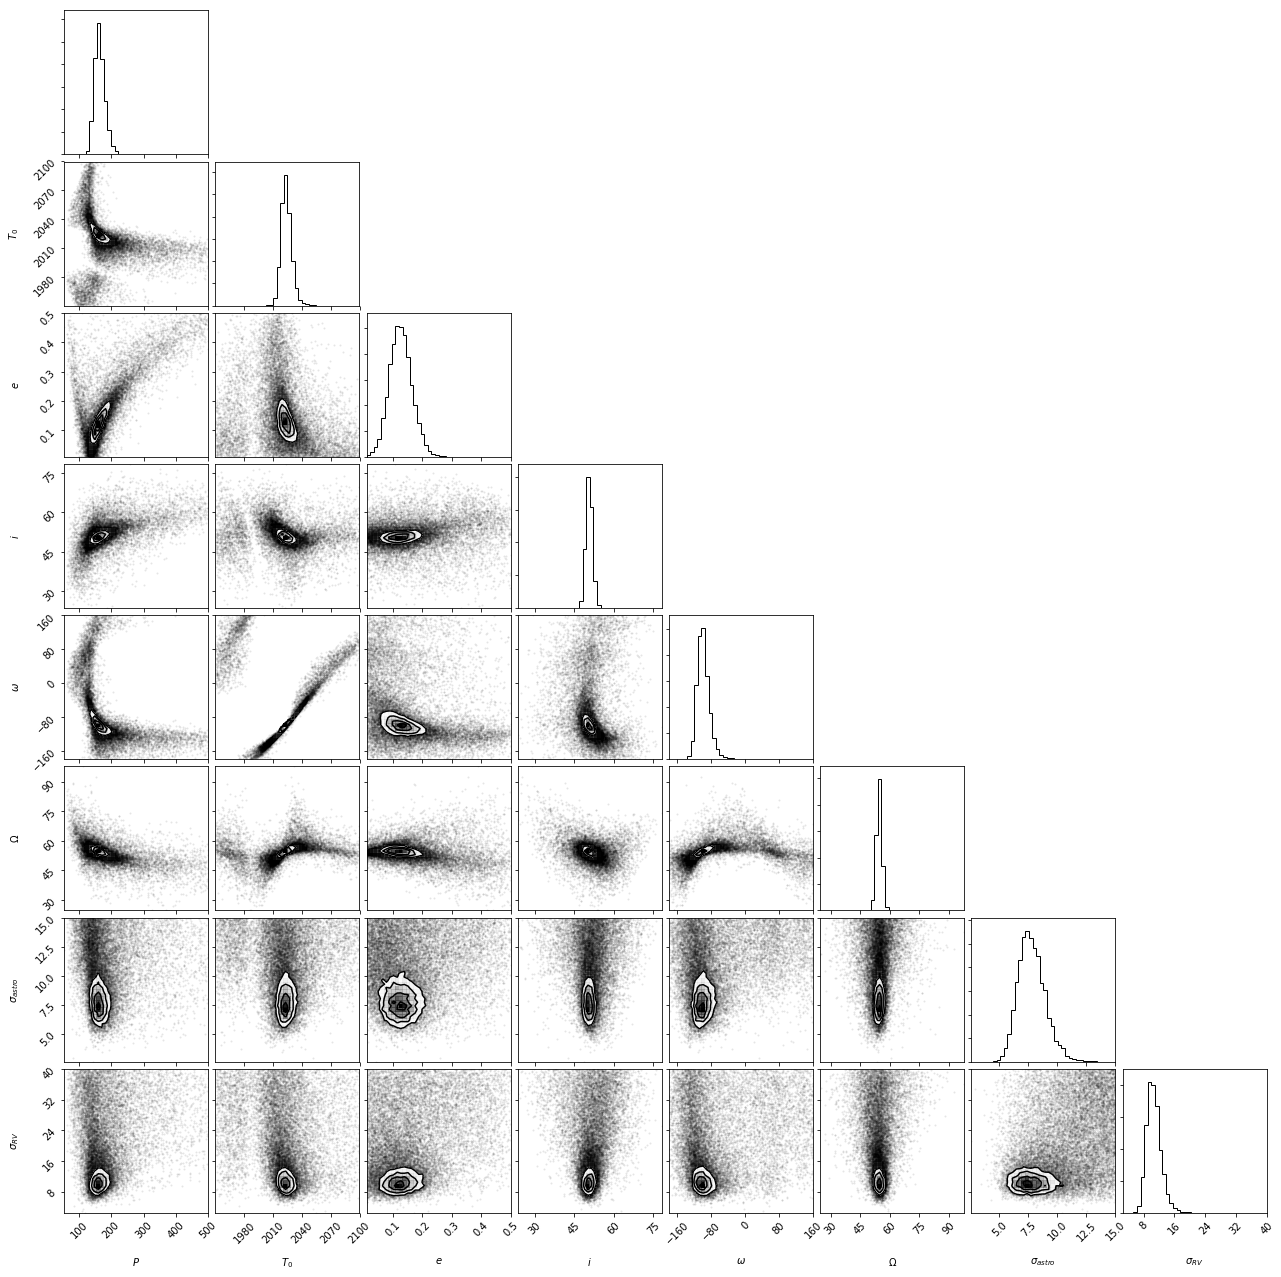

In [59]:
## Corner Plot ##

if corr == '':
    lab = [r"$P$" , r"$T_{0}$",r"$e$",
           	r"$i$",r"$\omega$",r"$\Omega$"]
    idx = [9,10,11,12,13,14]
if corr == '_sys':
    lab = [r"$P$" , r"$T_{0}$",r"$e$",
           	r"$i$",r"$\omega$",r"$\Omega$",r"$\sigma_{astro}$",r"$\sigma_{RV}$"]
    idx = [9,10,11,12,13,14,15,16]
if corr == '_vz0':
    lab = [r"$v_{z_0}$",r"$P$" , r"$T_{0}$",r"$e$",
           	r"$i$",r"$\omega$",r"$\Omega$"]
    idx = [8,9,10,11,12,13,14]
if corr == '_sysRV':
    lab = [r"$P$" , r"$T_{0}$",r"$e$",
           	r"$i$",r"$\omega$",r"$\Omega$",r"$\sigma_{RV}$"]
    idx = [9,10,11,12,13,14,16]

co.corner(ch[:,idx],weights=ch[:,0],labels=lab,bins=40) # 100
plt.savefig('./figs/'+blob+corr+'_cor.png')
plt.show()

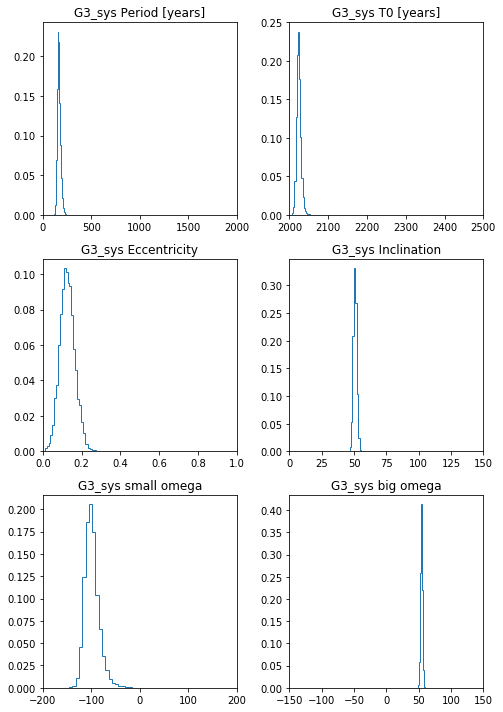

In [60]:
## Orbital parameters

plt.subplot(321) #(231)
plt.hist(ch[:,9],weights=ch[:,0],histtype='step',bins=50)
plt.title(blob+corr+' Period [years]')
plt.xlim([0,2000])

plt.subplot(322)
plt.hist(ch[:,10],weights=ch[:,0],histtype='step',bins=50)
plt.title(blob+corr+' T0 [years]')
plt.xlim([2000, 2500])

plt.subplot(323)
plt.hist(ch[:,11],weights=ch[:,0],histtype='step',bins=50)
plt.title(blob+corr+' Eccentricity')
plt.xlim([0, 1])

plt.subplot(324)
plt.hist(ch[:,12],weights=ch[:,0],histtype='step',bins=50)
plt.title(blob+corr+' Inclination')
plt.xlim([0, 150])

plt.subplot(325)
plt.hist(ch[:,13],weights=ch[:,0],histtype='step',bins=50)
plt.title(blob+corr+' small omega')
plt.xlim([-200, 200])

plt.subplot(326)
plt.hist(ch[:,14],weights=ch[:,0],histtype='step',bins=50)
plt.title(blob+corr+' big omega')
plt.xlim([-150, 150])

plt.gcf().set_size_inches((7,10)) #10,5
plt.tight_layout()
plt.savefig('./figs/'+blob+corr+'_histos.png')
plt.show()
#fig.savefig(blob+'histos.png')

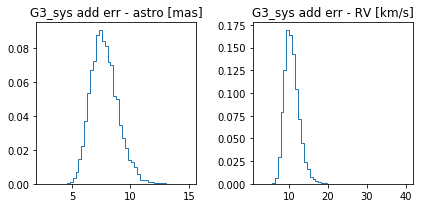

In [61]:
## Additive error

if corr == '_sys':
    plt.subplot(121)
    plt.hist(ch[:,15],weights=ch[:,0],histtype='step',bins=50)
    plt.title(blob+corr+' add err - astro [mas]')

    plt.subplot(122)
    plt.hist(ch[:,16],weights=ch[:,0],histtype='step',bins=50)
    plt.title(blob+corr+' add err - RV [km/s]')

    plt.gcf().set_size_inches((6,3))
    plt.tight_layout()
    plt.savefig('./figs/'+blob+corr+'_add_err.png')
    plt.show()
#

In [62]:
dat = np.loadtxt('./'+blob+'.points')

res = np.loadtxt('chains_'+blob+corr+'/'+blob+'_res.points') 
mod = np.loadtxt('chains_'+blob+corr+'/'+blob+'_mod.points')

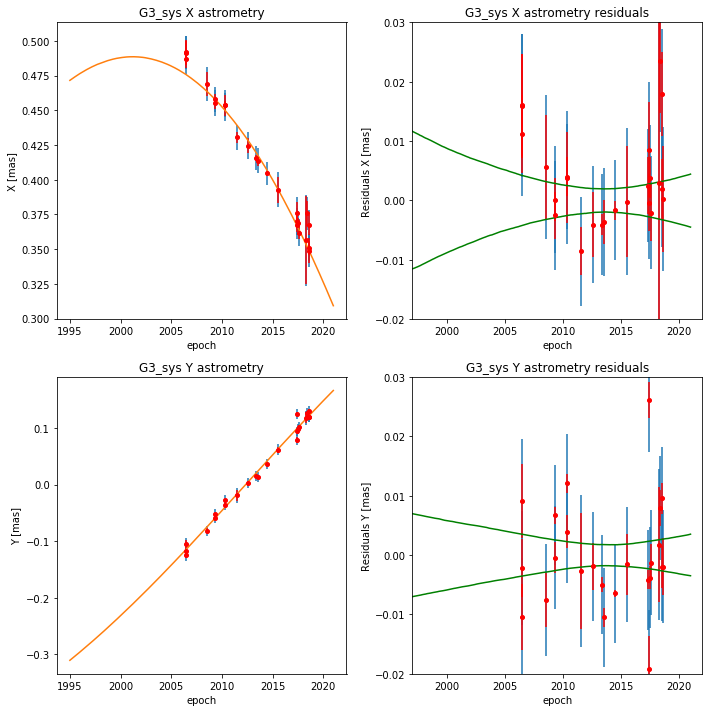

In [63]:
## astro residuals

plt.subplot(221)
plt.errorbar(dat[:,0],dat[:,1],yerr=res[:,3],ls='None')
plt.errorbar(dat[:,0],dat[:,1],yerr=dat[:,3],ls='None',color='red', marker='o', markersize=4)
plt.plot(mod[:,0],mod[:,3])
plt.ylabel('X [mas]')
plt.xlabel('epoch')
plt.title(blob+corr+' X astrometry')
    
plt.subplot(222)
plt.errorbar(res[:,0],res[:,1],yerr=res[:,3],ls='None')
plt.errorbar(res[:,0],res[:,1],yerr=dat[:,3],ls='None', color='red', marker='o', markersize=4)
plt.plot(mod[:,0],mod[:,2]-mod[:,3],'g')
plt.plot(mod[:,0],mod[:,4]-mod[:,3],'g')
plt.ylim([-0.02, 0.03])
plt.xlim([1997, 2022])
plt.ylabel('Residuals X [mas]')
plt.xlabel('epoch')
plt.title(blob+corr+' X astrometry residuals')
    
plt.subplot(223)
plt.errorbar(dat[:,0],dat[:,2],yerr=res[:,4],ls='None')
plt.errorbar(dat[:,0],dat[:,2],yerr=dat[:,4],ls='None',color='red', marker='o', markersize=4)
plt.plot(mod[:,0],mod[:,8])
plt.ylabel('Y [mas]')
plt.xlabel('epoch')
plt.title(blob+corr+' Y astrometry')

plt.subplot(224)
plt.errorbar(res[:,0],res[:,2],yerr=res[:,4],ls='None')
plt.errorbar(res[:,0],res[:,2],yerr=dat[:,4],ls='None', color='red', marker='o', markersize=4)
plt.plot(mod[:,0],mod[:,7]-mod[:,8],'g')
plt.plot(mod[:,0],mod[:,9]-mod[:,8],'g')
plt.ylim([-0.02, 0.03])
plt.xlim([1997, 2022])
plt.ylabel('Residuals Y [mas]')
plt.xlabel('epoch')
plt.title(blob+corr+' Y astrometry residuals')

plt.gcf().set_size_inches((10,10))
plt.tight_layout()
plt.savefig('./figs/'+blob+corr+'_res_astro.png')
plt.show()

In [64]:
datR = np.loadtxt('./'+blob+'.rv')

resR = np.loadtxt('chains_'+blob+corr+'/'+blob+'_res.rv') 
modR = np.loadtxt('chains_'+blob+corr+'/'+blob+'_mod.rv')

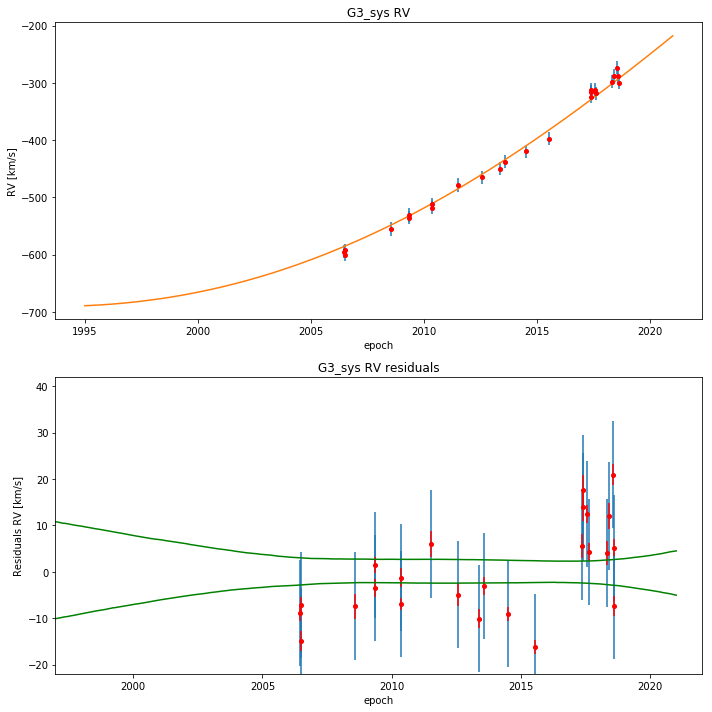

In [65]:
## RV residuals

plt.subplot(211)

plt.errorbar(datR[:,0],datR[:,1],yerr=resR[:,2],ls='None')
plt.errorbar(datR[:,0],datR[:,1],yerr=datR[:,2],ls='None',color='red', marker='o', markersize=4)
plt.plot(modR[:,0],modR[:,3])
plt.ylabel('RV [km/s]')
plt.xlabel('epoch')
plt.title(blob+corr+' RV')

    
plt.subplot(212)
plt.errorbar(resR[:,0],resR[:,1],yerr=resR[:,2],ls='None')
plt.errorbar(resR[:,0],resR[:,1],yerr=datR[:,2],ls='None', color='red', marker='o', markersize=4)
plt.plot(modR[:,0],modR[:,2]-modR[:,3],'g')
plt.plot(modR[:,0],modR[:,4]-modR[:,3],'g')
plt.ylim([-22, 42])
plt.xlim([1997, 2022])
plt.ylabel('Residuals RV [km/s]')
plt.xlabel('epoch')
plt.title(blob+corr+' RV residuals')

plt.gcf().set_size_inches((10,10))
plt.tight_layout()
plt.savefig('./figs/'+blob+corr+'_res_RV.png')
plt.show()

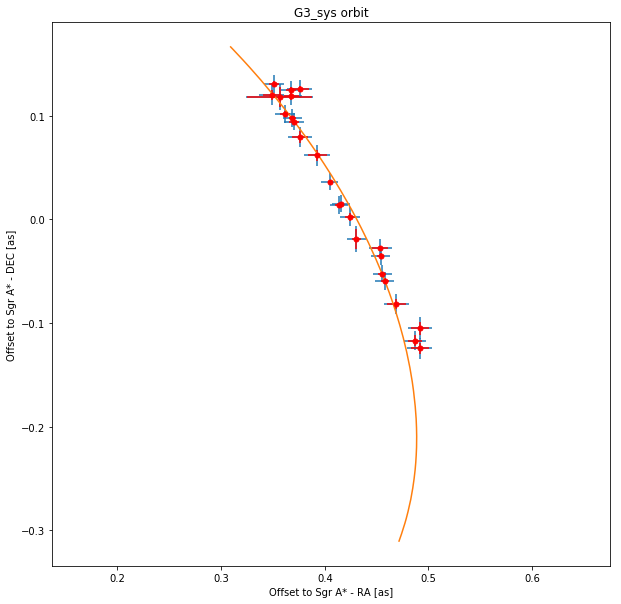

In [66]:
## Orbit
#plt.errorbar(dat[:,0],dat[:,2],yerr=res[:,4],ls='None')
plt.errorbar(dat[:,1],dat[:,2],xerr=res[:,3],yerr=res[:,4],ls='None')
plt.errorbar(dat[:,1],dat[:,2],xerr=dat[:,3],yerr=dat[:,4],ls='None', marker='o', markersize=5, color='red')
plt.plot(mod[:,3],mod[:,8])
plt.title(blob+corr+' orbit')
plt.xlabel('Offset to Sgr A* - RA [as]')
plt.ylabel('Offset to Sgr A* - DEC [as]')

plt.axis('equal')

#plt.xlim([-0.1,.9])
#plt.ylim([-.4,.3])
plt.gcf().set_size_inches((10,10))
plt.savefig('./figs/'+blob+corr+'_orbit.png')
plt.show()

In [67]:
print corr

_sys


In [54]:
#lab = [r"$v_{z_0}$",r"$P$" , r"$T_{0}$",r"$e$",
#          	r"$i$",r"$\omega$",r"$\Omega$"]
#idx = [8,9,10,11,12,13,14]

#co.corner(chvz0[:,idx],weights=chvz0[:,0],labels=lab,bins=40)
#plt.savefig('G3_cor_vz0.png')

In [55]:
#lab = [r"$P$" , r"$T_{0}$",r"$e$",
#           	r"$i$",r"$\omega$",r"$\Omega$",r"$\sigma_{astro}$",r"$\sigma_{RV}$"]
#idx = [9,10,11,12,13,14,15,16]

#co.corner(chsys[:,idx],weights=chsys[:,0],labels=lab,bins=40)
#plt.savefig('G3_cor_sys.png')

In [56]:
#lab = [r"$P$" , r"$T_{0}$",r"$e$",
#           	r"$i$",r"$\omega$",r"$\Omega$",r"$\sigma_{RV}$"]
#idx = [9,10,11,12,13,14,16]

#co.corner(chsysRV[:,idx],weights=chsysRV[:,0],labels=lab,bins=40)
#plt.savefig('G3_cor_sysRV.png')